# Analytical Sliding Block Model
Creates (mostly) analytical solutions for rigid sliding block analyses with harmonic input.

## Approach
The analytical model uses one cycle of a sine wave acceleration input ($\ddot{u}_{base}$).
The sine wave has input frequency, $f$ (Hz):

$\ddot{u}_{base}(t) = \sin 2 \pi f t $

The start of sliding occurs at $t_1$, when $\ddot{u}_{base}$ is equal to the yield acceleration, $k_y$. 
By definition, the slope of the input velocity signal ($\dot{u}_{base}$) at this time is $\ddot{u}_{base}(t_1) = k_y$.
With this slope, and the cordinate ($t_1$,$\dot{u}_{base}(t_1)$), we can find the equation for the block velocity ($\dot{u}_{block}$) as:

$\dot{u}_{block}(t) = g k_y (t - t_1) - \dot{u}_{base}(t_1)$

The end of sliding occurs at $t_2$, when $\dot{u}_{block}(t)$ is equal to $\dot{u}_{base}(t)$. 
Unfortunately, solving for $t_2$ is non-trivial because it involves a transendental equation (it essentially boils down to $x = \cos x$).
The intersection between $\dot{u}_{block}(t)$ and $\dot{u}_{base}(t)$ can only be approximated numerically, which means the "analytical" solution presented here isn't truly analytical.
But since we'll be solving with a numerical solver with a tolerance of $1e^{-15}$ seconds, and the AIA and DIA models typically work with signals on the order of $1e^{-3}$ seconds, the numerical portion of the "analytical" sliding block doesn't disqualify it from acting as a basis of comparing the AIA and DIA models.

The analytical model only provides the accumulated displacement for a single cycle of motion.
When compared to DIA and AIA simulations with longer duration, the results should be multiplied by the number of cycles in the longer simulation.
The comparison is only valid if the number of cycles in the longer simulation is an integer value.



In [ ]:
# If running in Jupyterlite with Pyodide, install the additional packages
%pip install pyslammer
%pip install numpy
%pip install matplotlib
%pip install ipympl
%matplotlib widget

In [1]:
# Import libraries
import numpy as np
import sympy as sym
import pandas as pd
import matplotlib.pyplot as plt

from pyslammer import analytical_sliding_block as asb

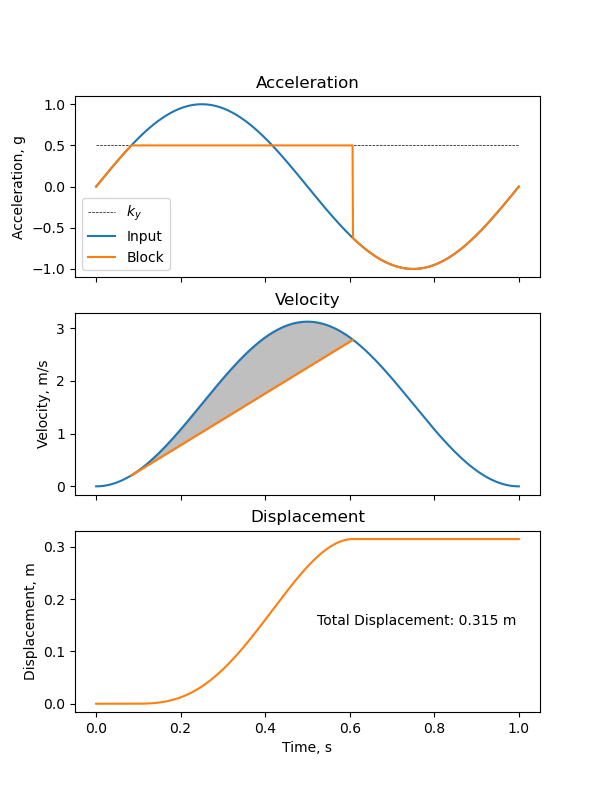

In [2]:
asb.find_harmonic_solution(1, 0.5, grav = 9.81, plot=True)